In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
print("Hello World")

Hello World


In [4]:
# Training Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harieh/ocr-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ocr-dataset


In [5]:
# Testing Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("preatcher/standard-ocr-dataset")

print("Path to dataset files:", path)

Mounting files to /kaggle/input/standard-ocr-dataset...
Path to dataset files: /kaggle/input/standard-ocr-dataset


In [2]:
# import os

# # walk through 10 classes of data
# for dirpath, dirnames, filenames in os.walk('/kaggle/input/ocr-dataset/dataset'):
#     print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [18]:
train_dir = "kaggle/input/standard-ocr-dataset/data/training_data"
test_dir = "kaggle/input/standard-ocr-dataset/data/testing_data"

In [4]:
# Lets view some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(dir, type):
    location = dir + '/' + type
    random_image = random.sample(os.listdir(location), 1)
    print(random_image)
    img = mpimg.imread(location + '/' + random_image[0])
    plt.imshow(img)
    plt.title(type)
    plt.axis('off');
    return img

['7019.png']


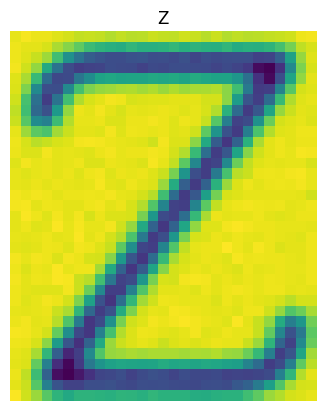

In [15]:
img = view_random_image('kaggle/input/standard-ocr-dataset/data/training_data', 'Z')

['28813.png']


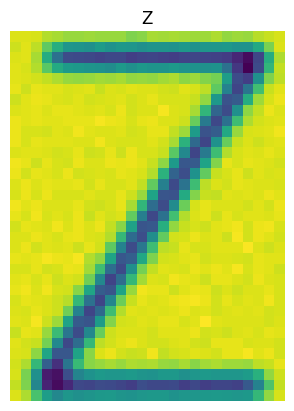

In [17]:
img2 = view_random_image('kaggle/input/standard-ocr-dataset/data/testing_data', 'Z')

In [6]:
# Standard import
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


In [7]:
# Lets preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255. )
test_datagen = ImageDataGenerator(rescale = 1/255. )

In [19]:
# Lets get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [20]:
print(len(class_names))

36


In [21]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 20628 images belonging to 36 classes.
Found 1008 images belonging to 36 classes.


In [22]:
print(class_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [23]:
# Lets create the custom model
customModel = Sequential([
    Conv2D(filters= 10, kernel_size = (3,3), padding='valid', activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(36, activation = 'softmax')
])

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
customModel.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [ ]:
customHistory = customModel.fit(
    train_data,
    epochs = 5,
    validation_data = test_data
)

Epoch 1/5


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


368/645 ━━━━━━━━━━━━━━━━━━━━ 3:52 840ms/step - accuracy: 0.6901 - loss: 1.2393

In [99]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    plt.plot(epochs, loss, label = 'Training Loss')
    plt.plot(epochs, val_loss, label = 'Validation Loss')
    plt.xlabel("Epochs")
    plt.title("Loss")
    plt.legend();

    plt.figure()
    plt.plot(epochs, accuracy, label = 'Training Accuracy')
    plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
    plt.xlabel("Epochs")
    plt.title("Accuracy")
    plt.legend()


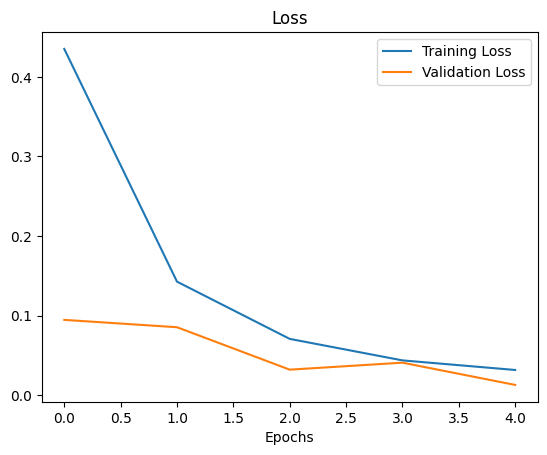

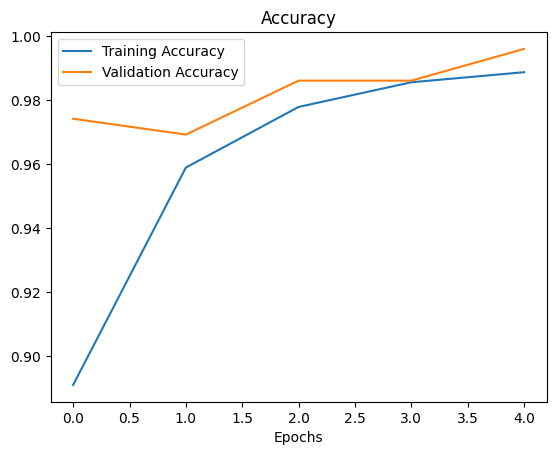

In [214]:
plot_loss_curves(customHistory)

In [215]:
customModel.evaluate(test_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9962 - loss: 0.0132


[0.012852621264755726, 0.9960317611694336]

# Prediction on Custom DataSet


In [ ]:
test_data2 = train_datagen2.flow_from_directory(
    test_dir2, 
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

In [225]:
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)  # Ensure RGB format
    img = tf.image.resize(img, (224, 224))       # Match input size
    img = img / 255.0                            # Normalize to [0, 1]
    return tf.expand_dims(img, axis=0)           # Add batch dimension



In [230]:

img_loc = "/kaggle/input/standard-ocr-dataset/data/testing_data/Z/28813.png"
img = preprocess_image(img_loc)

In [231]:
pred = customModel.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [232]:
import numpy as np
np.max(pred)
idx = np.argmax(pred)
print(class_names[idx])

Z
